# Код Шеннона-Фано


In [45]:
with open('file.txt', encoding='utf-8', mode='r') as file:
    text = file.read()

text

'Счастлив путник, который после длинной, скучной дороги, с ее холодами, слякотью, грязью, невыспавшимися станционными смотрителями, бряканьями колокольчиков, починками, перебранками, ямщиками, кузнецами и всякого рода дорожными подлецами, видит наконец знакомую крышу с несущимися навстречу огоньками, и предстанут пред ним знакомые комнаты, радостный крик выбежавших навстречу людей, шум и беготня детей и успокоительные тихие речи, прерываемые пылающими лобзаниями, властными истребить всё печальное из памяти. Счастлив семьянин, у кого есть такой угол, но горе холостяку! Счастлив писатель, который мимо характеров скучных, противных, поражающих печальною своей действительностью, приближается к характерам, являющим высокое достоинство человека, который из великого омута ежедневно вращающихся образов избрал одни немногие исключения, который не изменял ни разу возвышенного строя своей лиры, не ниспускался с вершины своей к бедным, ничтожным своим собратьям и, не касаясь земли, весь повергался

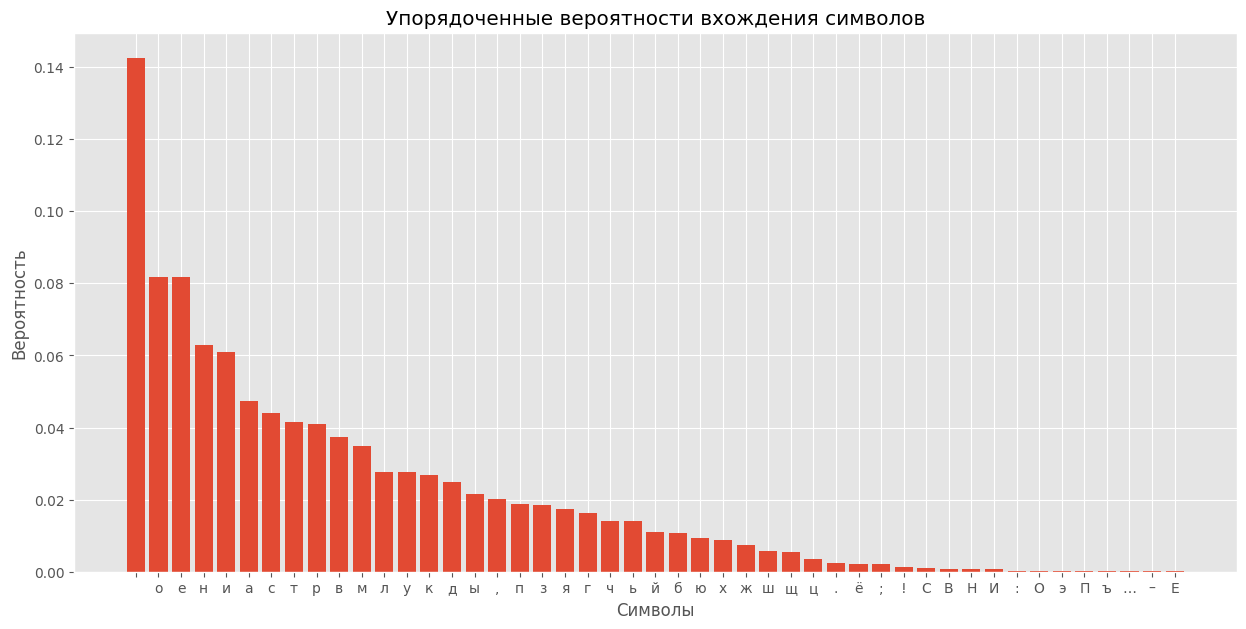

In [46]:
import matplotlib.pyplot as plt

from collections import Counter, OrderedDict

sym_counter = Counter(text)
sc_len = sum(sym_counter.values())
symd = {
    letter: count / sc_len
    for letter, count in sym_counter.items()
}

alphabet_probas = OrderedDict(sorted(
    symd.items(),
    key=lambda kv: kv[1],
    reverse=True,
))

plt.figure(figsize=(15, 7))
plt.bar(alphabet_probas.keys(), alphabet_probas.values())
plt.xlabel('Символы')
plt.ylabel('Вероятность')
plt.title('Упорядоченные вероятности вхождения символов')
plt.show()

In [47]:
letter_list = list(alphabet_probas.keys())
letter_probas = list(alphabet_probas.values())

In [48]:
def best_partition(initial, final):
    # Points.
    pts = []
    for i in range(initial + 1, final):
        diff = abs(sum(letter_probas[initial:i]) - sum(letter_probas[i:final]))
        pts.append(diff)

    print(pts.index(min(pts)) + initial)
    if pts.index(min(pts)) < initial:
        return pts.index(min(pts)) + initial

    return pts.index(min(pts))


def up(initial, final):
    for i in range(initial, final):
        sym_counter[i] = sym_counter[i] + '0'


def down(initial, final):
    for i in range(initial, final):
        sym_counter[i] = sym_counter[i] + '1'

In [49]:
initial = 0
final = len(letter_probas)
sym_counter = [''] * (len(letter_probas))
current_index = [(initial, final)]
new_index = []
stage = 1
while current_index:
    print(f'Stage: {stage}')
    print(sym_counter)
    new_index = []
    for index in current_index:
        if index[1] - index[0] == 2:
            sym_counter[index[0]] = sym_counter[index[0]] + '0'
            sym_counter[index[1] - 1] = sym_counter[index[1] - 1] + '1'

        if index[1] - index[0] > 2:
            index_ptr = best_partition(index[0], index[1]) + 1
            new_index.append((index[0], index_ptr))
            up(index[0], index_ptr)
            new_index.append((index_ptr, index[1]))
            down(index_ptr, index[1])
        current_index = new_index
    print()
    stage += 1

# for last stage
if not current_index:
    print(f'Stage: {stage}')
    print(sym_counter)
    new_index = []

Stage: 1
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
6

Stage: 2
['0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
1
13

Stage: 3
['00', '00', '01', '01', '01', '01', '01', '10', '10', '10', '10', '10', '10', '10', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11']
3
9
19

Stage: 4
['000', '001', '010', '010', '011', '011', '011', '100', '100', '100', '101', '101', '101', '101', '110', '110', '110', '110', '110', '110', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', '111', 

In [50]:
import pandas as pd

pd.DataFrame({
    'Символ': letter_list,
    'Вероятность': letter_probas,
    'Кодовое слово': sym_counter,
})

,Символ,Вероятность,Кодовое слово
0,,0.142400,000
1,о,0.081867,001
2,е,0.081867,0100
3,н,0.062933,0101
4,и,0.061067,0110
5,а,0.047467,01110
6,с,0.044000,01111
7,т,0.041600,1000
8,р,0.041067,10010
9,в,0.037333,10011


## Кодирование текста

In [51]:
encoded_message = ''.join(sym_counter)
print(f'Закодированное сообщение:\n{encoded_message}')

Закодированное сообщение:
0000010100010101100111001111100010010100111010010101101101011111000110010110011110101101101101111110001110011110101110111111001111010111101111111001111101011111011111111001111110101111110111111111001111111010111111101111111111001111111101011111111011111111111000111111111001111111111010111111111011111111111100111111111101111111111110111111111111


## Эффективность сжатия

In [52]:
plain_len = len(''.join(format(ord(x), 'b') for x in text))
encoded_len = len(encoded_message)

print(f'Эффективность сжатия: {1 - (encoded_len / plain_len):.10f}')

Эффективность сжатия: 0.9909164895
